<a href="https://colab.research.google.com/github/justprophet/Movie-Recommendation-System/blob/master/code/demographic_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries

In [0]:
import numpy as np

In [0]:
import pandas as pd
import io

##Mounting Drive

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


##Loading Data

In [0]:
df = pd.read_csv('gdrive/My Drive/Assignment 2/Data/merged_without_ratings_data.csv')

In [0]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,genres,id,overview,popularity,title,vote_average,vote_count,cast,crew,keywords
0,0,0,0,0,0,0,0,0,"['Animation', 'Comedy', 'Family']",862.0,"Led by Woody, Andy's toys live happily in his ...",21.946943,Toy Story,7.7,5415.0,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...","['John Lasseter', 'Joss Whedon', 'Andrew Stant...","['jealousy', 'toy', 'boy', 'friendship', 'frie..."
1,1,1,1,1,1,1,1,1,"['Adventure', 'Fantasy', 'Family']",8844.0,When siblings Judy and Peter discover an encha...,17.015539,Jumanji,6.9,2413.0,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...","['Larry J. Franco', 'Jonathan Hensleigh', 'Jam...","['board game', 'disappearance', ""based on chil..."
2,2,2,2,2,2,2,2,2,"['Romance', 'Comedy']",15602.0,A family wedding reignites the ancient feud be...,11.712900,Grumpier Old Men,6.5,92.0,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...","['Howard Deutch', 'Mark Steven Johnson', 'Mark...","['fishing', 'best friend', 'duringcreditssting..."
3,3,3,3,3,3,3,3,3,"['Comedy', 'Drama', 'Romance']",31357.0,"Cheated on, mistreated and stepped on, the wom...",3.859495,Waiting to Exhale,6.1,34.0,"['Whitney Houston', 'Angela Bassett', 'Loretta...","['Forest Whitaker', 'Ronald Bass', 'Ronald Bas...","['based on novel', 'interracial relationship',..."
4,4,4,4,4,4,4,4,4,['Comedy'],11862.0,Just when George Banks has recovered from his ...,8.387519,Father of the Bride Part II,5.7,173.0,"['Steve Martin', 'Diane Keaton', 'Martin Short...","['Alan Silvestri', 'Elliot Davis', 'Nancy Meye...","['baby', 'midlife crisis', 'confidence', 'agin..."


In [0]:
df.shape

(45629, 18)

##IMDB weighted rating calculation

Weighted Rating(WR)=((v/(v+m)).R) + ((m/(v+m)).C)

v = vote_count

```

```


m = minimum votes required to be listed in chart

```

```



R = average rating of the movie (vote_average)

```

```


C = mean vote across whole data

###Calculation of C

In [0]:
C= df['vote_average'].mean()
C

5.632308400359136

###Calculation of m

In [0]:
#for a movie to feature in the charts, it must have more votes than at least 90% of the movies in the list.
m= df['vote_count'].quantile(0.9)
m

162.0

##Movies qualified to be in chart

In [0]:
q_movies = df.copy().loc[df['vote_count'] >= m]
q_movies.shape

(4566, 18)

In [0]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [0]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [0]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
312,The Shawshank Redemption,8358.0,8.5,8.445473
826,The Godfather,6024.0,8.5,8.424900
10327,Dilwale Dulhania Le Jayenge,661.0,9.1,8.417417
12507,The Dark Knight,12269.0,8.3,8.265235
2840,Fight Club,9678.0,8.3,8.256081
291,Pulp Fiction,8670.0,8.3,8.251068
520,Schindler's List,4436.0,8.3,8.206010
23623,Whiplash,4376.0,8.3,8.204767
5484,Spirited Away,3968.0,8.3,8.195359
2205,Life Is Beautiful,3643.0,8.3,8.186422


Text(0.5, 1.0, 'Popular Movies')

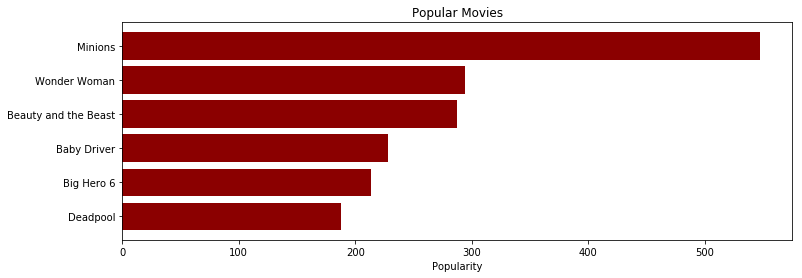

In [0]:
pop= df.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='darkred')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")